In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
#Autocompletado rapido
%config IPCompleter.greedy = True

In [7]:
df = pd.read_csv("spotify_history.csv")
df

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


# EDA (Fase de Exploración y Preprocesamiento de Datos)

In [11]:
df.isna().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [17]:
#Se considero eliminar los nulos debido a que la cantidad no supera el 5% de los registros total
df.dropna(axis = 0, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149648 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149648 non-null  object
 1   ts                 149648 non-null  object
 2   platform           149648 non-null  object
 3   ms_played          149648 non-null  int64 
 4   track_name         149648 non-null  object
 5   artist_name        149648 non-null  object
 6   album_name         149648 non-null  object
 7   reason_start       149648 non-null  object
 8   reason_end         149648 non-null  object
 9   shuffle            149648 non-null  bool  
 10  skipped            149648 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 11.7+ MB


In [22]:
df[df.duplicated(keep = False)]

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
1683,3GGUWP38wpqwwu5njjjUVx,2015-09-10 03:25:39,android,0,Je Danse dans ma Tête,Céline Dion,On ne change pas,clickrow,endplay,True,True
1684,3GGUWP38wpqwwu5njjjUVx,2015-09-10 03:25:39,android,0,Je Danse dans ma Tête,Céline Dion,On ne change pas,clickrow,endplay,True,True
4108,4kDTvLhGF29gFsqceuxBSC,2016-07-17 22:37:14,android,261080,Not Today,Imagine Dragons,Me Before You,clickrow,trackdone,False,False
4113,4x8KNLPK3PI7sRWBYoOpFQ,2016-07-17 22:37:14,android,165746,I'm Gonna Find Another You - Acoustic,John Mayer,The Village Sessions,trackdone,trackdone,True,False
4116,74X1epeRufHckhuX1KFD04,2016-07-17 22:37:14,android,413320,Hallelujah,Jeff Buckley,Grace (Legacy Edition),trackdone,trackdone,False,False
...,...,...,...,...,...,...,...,...,...,...,...
122904,1p7m9H4H8s0Y7SgRm7j3ED,2022-08-04 20:20:40,android,0,Flaca,Andrés Calamaro,Alta Suciedad,remote,endplay,False,False
125712,4401c08DdNwwGEg8WGCkQf,2022-10-01 23:18:48,android,1611,Paperback Writer - Remastered 2009,The Beatles,Past Masters,fwdbtn,fwdbtn,True,False
125713,4401c08DdNwwGEg8WGCkQf,2022-10-01 23:18:48,android,1611,Paperback Writer - Remastered 2009,The Beatles,Past Masters,fwdbtn,fwdbtn,True,False
125760,0LxCY6cjKgjutOZaqyjrVQ,2022-10-02 18:34:27,android,221693,Hombre de ninguna parte,Xoel López,Atlántico,fwdbtn,trackdone,True,False


In [25]:
#Eliminando los duplicados 
df.drop_duplicates(keep = 'first', inplace = True)
df

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148463 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  148463 non-null  object
 1   ts                 148463 non-null  object
 2   platform           148463 non-null  object
 3   ms_played          148463 non-null  int64 
 4   track_name         148463 non-null  object
 5   artist_name        148463 non-null  object
 6   album_name         148463 non-null  object
 7   reason_start       148463 non-null  object
 8   reason_end         148463 non-null  object
 9   shuffle            148463 non-null  bool  
 10  skipped            148463 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 11.6+ MB


In [32]:
#Convirtiendo en fecha la columna ts
df['ts'] = pd.to_datetime(df['ts'], utc = True, errors = 'coerce')
df

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34+00:00,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37+00:00,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24+00:00,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40+00:00,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52+00:00,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19+00:00,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21+00:00,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22+00:00,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23+00:00,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True


In [57]:
df['fecha'] = df.ts.dt.date
df['año'] = df.ts.dt.year
df['mes'] = df.ts.dt.month
df['dia'] = df.ts.dt.day
df['semana'] = df.ts.dt.day_name()
df['hora'] = df.ts.dt.hour
df['minuto'] = df.ts.dt.minute
df['segundos'] = df.ts.dt.second
df['minutes_played'] = df['ms_played'] / 60000

In [58]:
df

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,hora,minuto,segundos,fecha,año,mes,dia,semana,minutes_played
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34+00:00,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,2,44,34,2013-07-08,2013,7,8,Monday,0.053083
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37+00:00,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2,45,37,2013-07-08,2013,7,8,Monday,1.031083
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24+00:00,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2,50,24,2013-07-08,2013,7,8,Monday,4.756433
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40+00:00,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2,52,40,2013-07-08,2013,7,8,Monday,2.233700
5,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52+00:00,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False,3,17,52,2013-07-08,2013,7,8,Monday,1.058083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19+00:00,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True,23,6,19,2024-12-15,2024,12,15,Sunday,0.020783
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21+00:00,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True,23,6,21,2024-12-15,2024,12,15,Sunday,0.025250
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22+00:00,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True,23,6,22,2024-12-15,2024,12,15,Sunday,0.021383
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23+00:00,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True,23,6,23,2024-12-15,2024,12,15,Sunday,0.021767


In [59]:
df = df[df['ms_played'] > 0].copy()

In [61]:
df.head(5)

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped,hora,minuto,segundos,fecha,año,mes,dia,semana,minutes_played
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34+00:00,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False,2,44,34,2013-07-08,2013,7,8,Monday,0.053083
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37+00:00,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False,2,45,37,2013-07-08,2013,7,8,Monday,1.031083
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24+00:00,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False,2,50,24,2013-07-08,2013,7,8,Monday,4.756433
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40+00:00,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False,2,52,40,2013-07-08,2013,7,8,Monday,2.233700
5,50VNvhzyaSplJCKWchN7a8,2013-07-08 03:17:52+00:00,web player,63485,Impossible,James Arthur,Impossible,clickrow,clickrow,False,False,3,17,52,2013-07-08,2013,7,8,Monday,1.058083


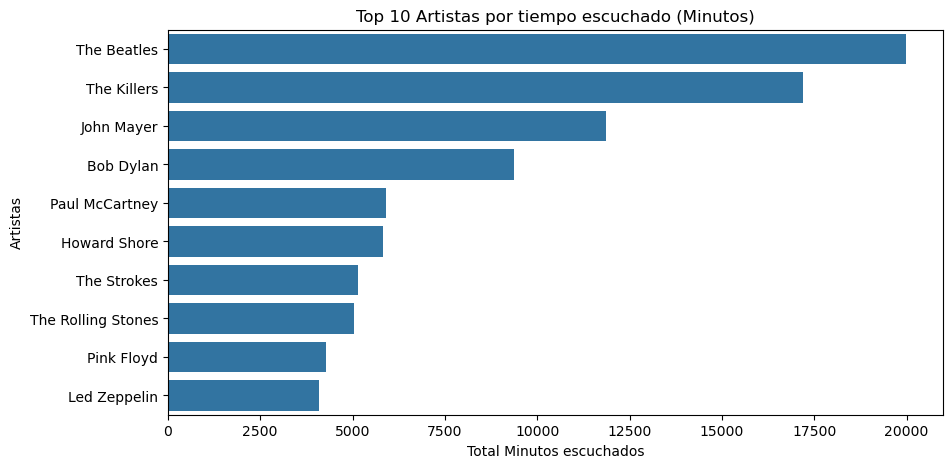

In [67]:
top10 = df.groupby('artist_name')['minutes_played'].sum().sort_values(ascending = False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.values, y=top10.index)
plt.title('Top 10 Artistas por tiempo escuchado (Minutos)')
plt.xlabel('Total Minutos escuchados')
plt.ylabel('Artistas')
plt.show();         

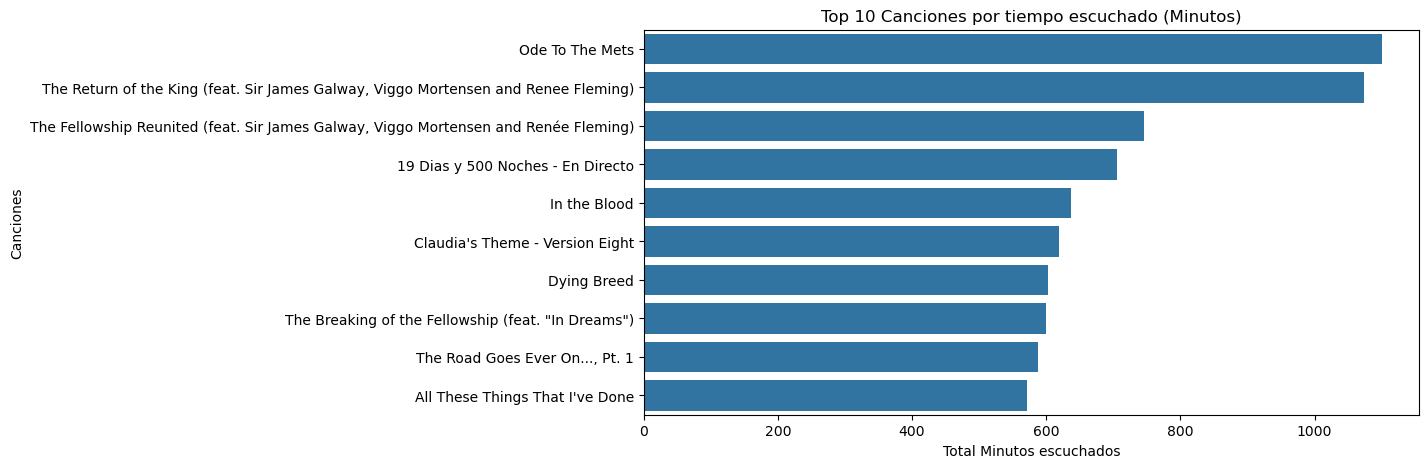

In [68]:
top10 = df.groupby('track_name')['minutes_played'].sum().sort_values(ascending = False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.values, y=top10.index)
plt.title('Top 10 Canciones por tiempo escuchado (Minutos)')
plt.xlabel('Total Minutos escuchados')
plt.ylabel('Canciones')
plt.show();  

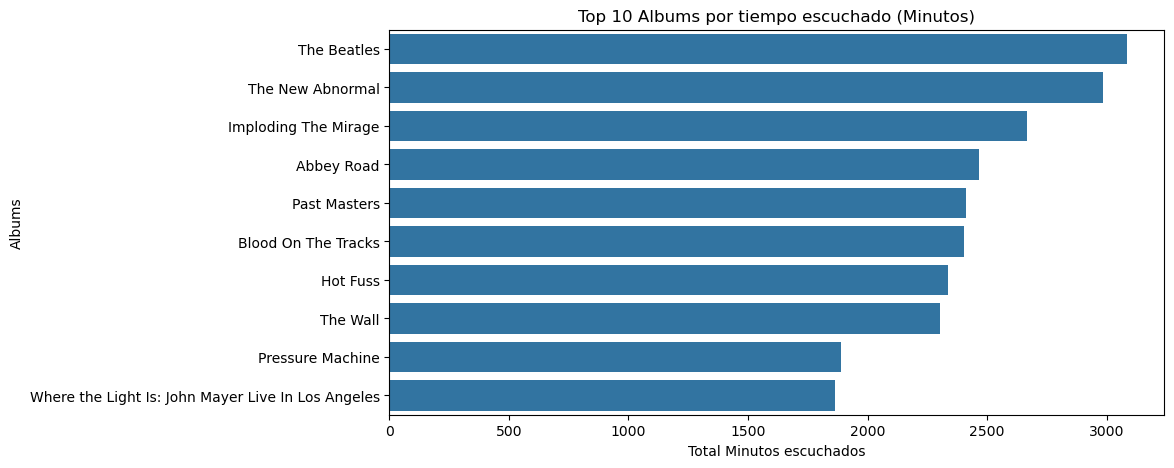

In [69]:
top10 = df.groupby('album_name')['minutes_played'].sum().sort_values(ascending = False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top10.values, y=top10.index)
plt.title('Top 10 Albums por tiempo escuchado (Minutos)')
plt.xlabel('Total Minutos escuchados')
plt.ylabel('Albums')
plt.show();  

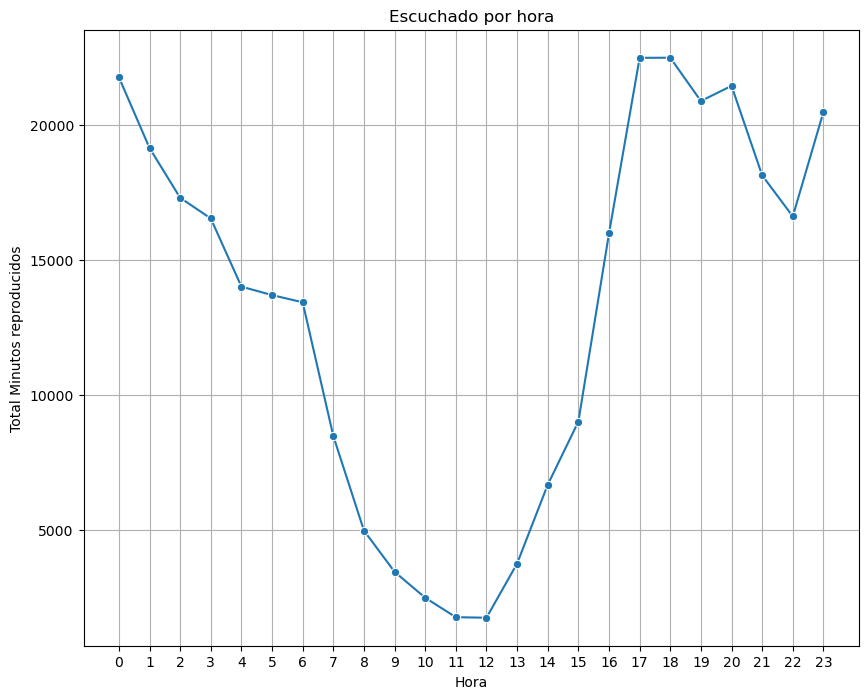

In [71]:
# Lista de escuchado por hora
hora = df.groupby('hora')['minutes_played'].sum()
plt.figure(figsize = (10,8))
sns.lineplot(x = hora.index, y = hora.values, marker = 'o')
plt.title('Escuchado por hora')
plt.xlabel('Hora')
plt.ylabel('Total Minutos reproducidos')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show();

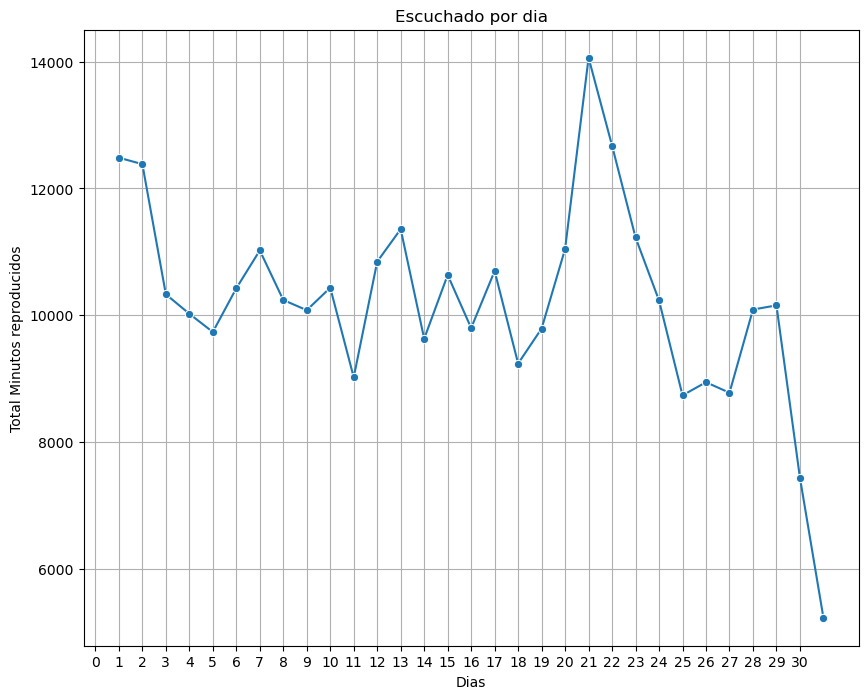

In [73]:
# Lista de escuchado por hora
hora = df.groupby('dia')['minutes_played'].sum()
plt.figure(figsize = (10,8))
sns.lineplot(x = hora.index, y = hora.values, marker = 'o')
plt.title('Escuchado por dia')
plt.xlabel('Dias')
plt.ylabel('Total Minutos reproducidos')
plt.xticks(range(0, 31))
plt.grid(True)
plt.show();

In [78]:
monthly_trend = df.groupby(['año', 'mes'])['minutes_played'].sum().reset_index()
monthly_trend['año_mes'] = pd.to_datetime(monthly_trend[['año','mes']].rename(columns = {'año' : 'year', 'mes':'month'}).assign(day=1))
monthly_trend

,año,mes,minutes_played,año_mes
0,2013,7,228.495783,2013-07-01
1,2013,8,138.957450,2013-08-01
2,2013,9,102.354650,2013-09-01
3,2014,1,62.363783,2014-01-01
4,2015,1,33.152850,2015-01-01
...,...,...,...,...
110,2024,8,2683.232367,2024-08-01
111,2024,9,2785.358967,2024-09-01
112,2024,10,3642.407400,2024-10-01
113,2024,11,3232.413250,2024-11-01


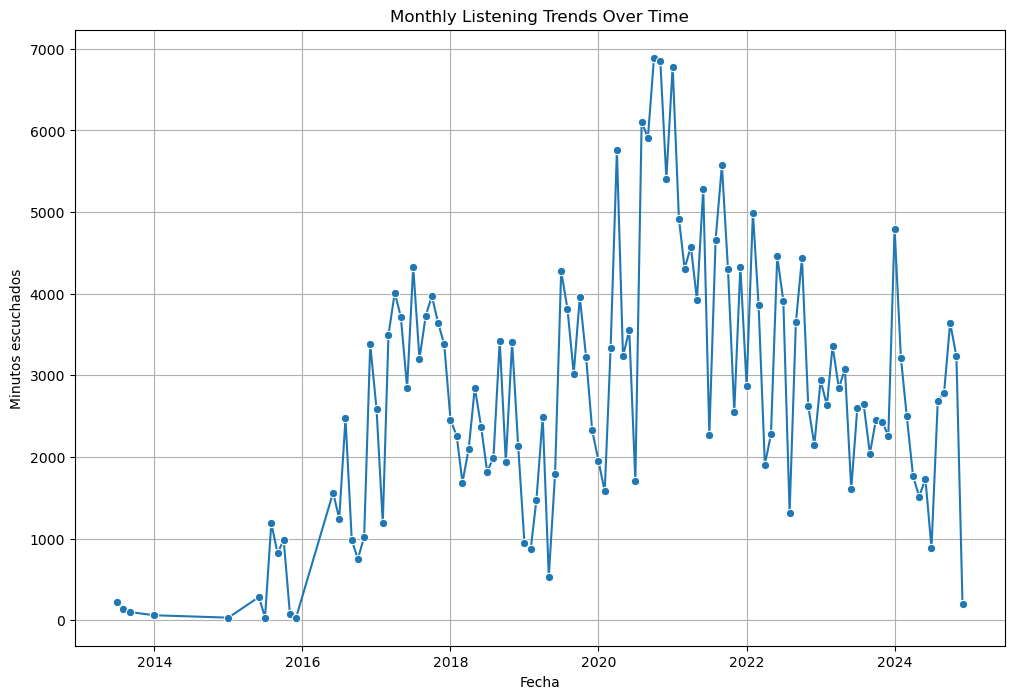

In [82]:
plt.figure(figsize =(12,8))
sns.lineplot(data = monthly_trend, x = 'año_mes', y = 'minutes_played', marker = 'o' )
plt.title('Monthly Listening Trends Over Time')
plt.xlabel('Fecha')
plt.ylabel('Minutos escuchados')
plt.grid(True)
plt.show();

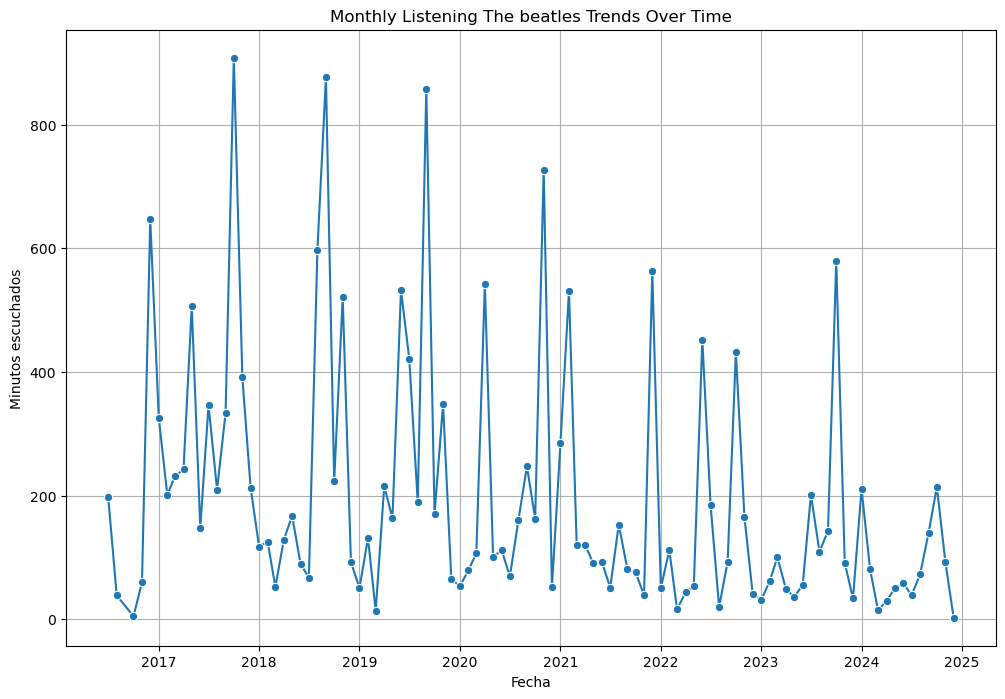

In [87]:
listening_bea = df[df['artist_name'] == 'The Beatles'].groupby(['año','mes'])['minutes_played'].sum().reset_index()
listening_bea['año_mes'] = pd.to_datetime(listening_bea[['año','mes']].rename(columns = {'año' : 'year', 'mes':'month'}).assign(day=1))
listening_bea

plt.figure(figsize =(12,8))
sns.lineplot(data = listening_bea, x = 'año_mes', y = 'minutes_played', marker = 'o' )
plt.title('Monthly Listening The beatles Trends Over Time')
plt.xlabel('Fecha')
plt.ylabel('Minutos escuchados')
plt.grid(True)
plt.show();

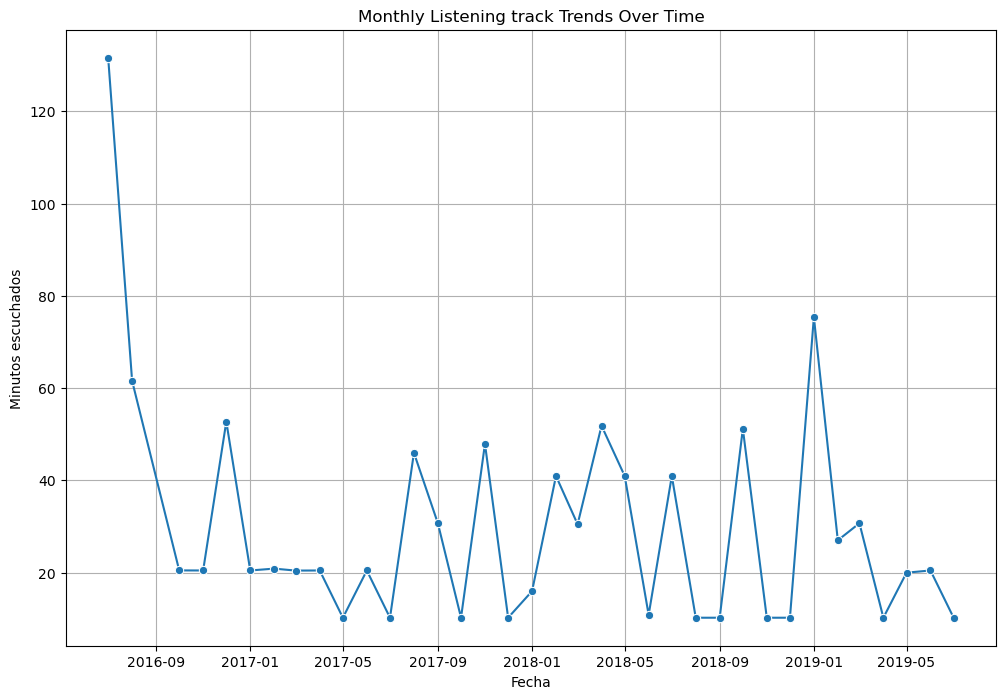

In [89]:
listening_mus = df[df['track_name'] == 'The Return of the King (feat. Sir James Galway, Viggo Mortensen and Renee Fleming)'].groupby(['año','mes'])['minutes_played'].sum().reset_index()
listening_mus['año_mes'] = pd.to_datetime(listening_bea[['año','mes']].rename(columns = {'año' : 'year', 'mes':'month'}).assign(day=1))
listening_mus

plt.figure(figsize =(12,8))
sns.lineplot(data = listening_mus, x = 'año_mes', y = 'minutes_played', marker = 'o' )
plt.title('Monthly Listening track Trends Over Time')
plt.xlabel('Fecha')
plt.ylabel('Minutos escuchados')
plt.grid(True)
plt.show();